In [ ]:
from sklearn.datasets import load_linnerud
import pandas as pd


data,target = load_linnerud(return_X_y=True, as_frame=True)

data.describe()


,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


In [12]:
target.describe()

,Weight,Waist,Pulse
count,20.000000,20.000000,20.000000
mean,178.600000,35.400000,56.100000
std,24.690505,3.201973,7.210373
min,138.000000,31.000000,46.000000
25%,160.750000,33.000000,51.500000
50%,176.000000,35.000000,55.000000
75%,191.500000,37.000000,60.500000
max,247.000000,46.000000,74.000000


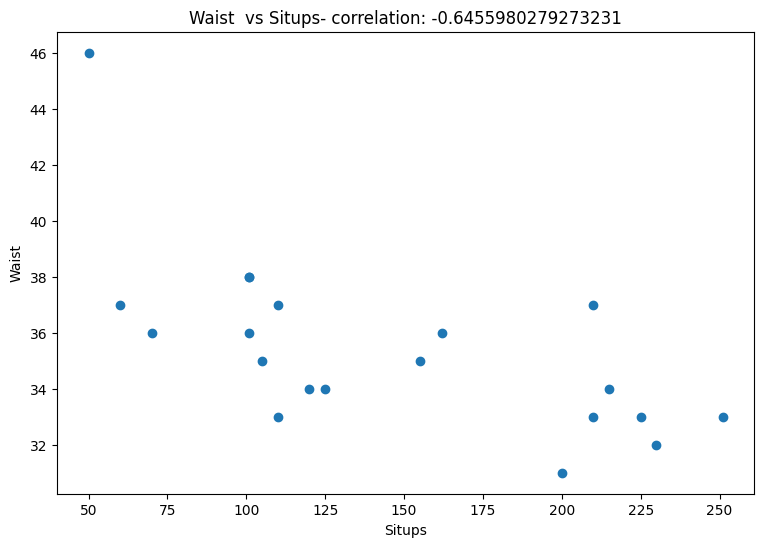

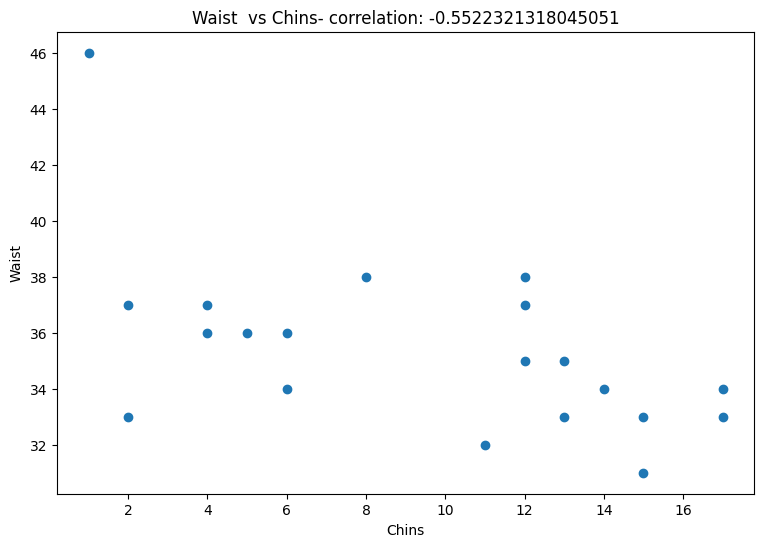

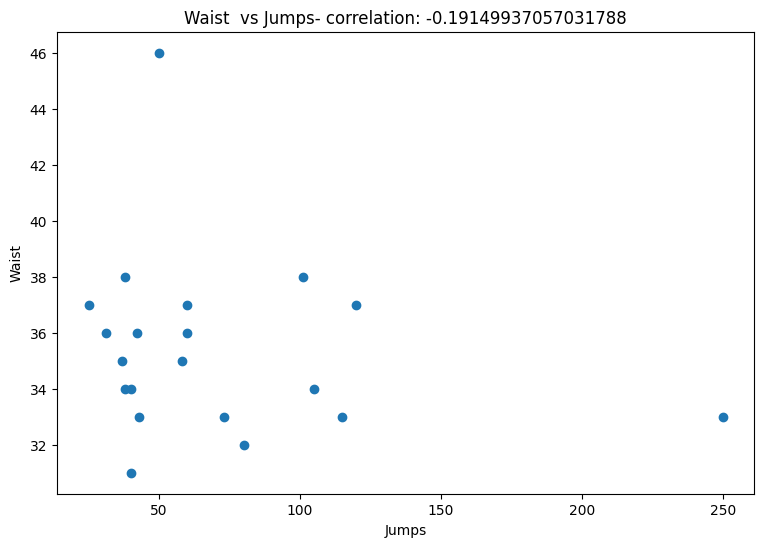

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

label = target['Waist']
# feature = data['Situps']

feature_cols = ['Situps', 'Chins', 'Jumps']

for col in feature_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Waist')
    ax.set_title('Waist  vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

feature = data['Situps']
label = target['Waist']

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.30, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [23]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:])
print('Actual labels   : ' ,y_test[:])

Predicted labels:  [31. 39. 39. 31. 33. 32.]
Actual labels   :  18    33.0
1     37.0
19    33.0
8     31.0
10    34.0
17    32.0
Name: Waist, dtype: float64


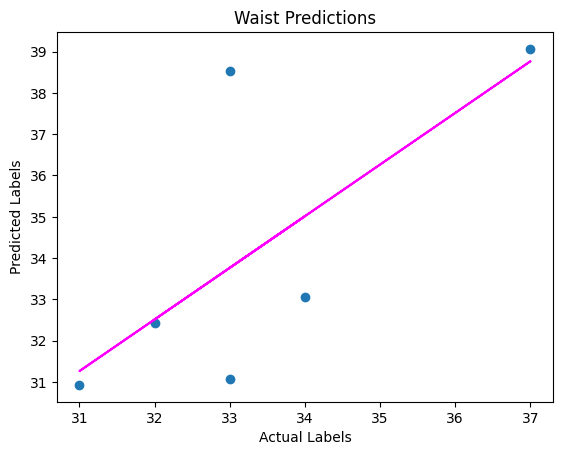

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Waist Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 6.611287588842579
RMSE: 2.5712424212513643
R2: -0.8594246343619751
